# Linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

## Create the model

- **Definition**:
    - $X \in \R^{m \times n}; \:y \in \R^{m \times 1}$
    - $(X, y)$ - training examples
    - $\alpha$ - learning rate

- **Model**: 
$f(X) = WX + b = \hat{y}$

- **Cost function**:
$J(W, b) = \frac{1}{n} \sum_{i=1}^{n}(f(x_i) - y_i)^2 = \frac{1}{n} \sum_{i=1}^{n}(Wx_i+b - y_i)^2$

- **Gradients**:
    - $\frac{\partial J(W,b)}{\partial W} = \frac{1}{n} \sum 2x_i(Wx_i + b - y_i)$
    - $\frac{\partial J(W,b)}{\partial b} = \frac{1}{n} \sum 2(Wx_i + b - y_i)$
    - In practice, we can get ride of the scaling factor $(2)$.

- **Gradient descent**:
    - $W = W - \alpha \frac{\partial J(W,b)}{\partial W}$
    - $b = b - \alpha \frac{\partial J(W,b)}{\partial b}$

In [2]:
class LinearRegression:
    def __init__(self, n_iter: int = 1000, learning_rate: float = 0.001) -> None:
        self.n_iter = n_iter
        self.learning_rate = learning_rate

    def _init_weights(self, n: int) -> None:
        self.W = np.random.randn(n)
        self.b = np.random.rand(1)

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        m, n = X.shape
        self._init_weights(n)

        for _ in range(self.n_iter):
            y_pred = self.predict(X)
            self.W -= self.learning_rate * (X.T.dot(y_pred - y) / m)
            self.b -= self.learning_rate * (np.sum(y_pred - y) / m)

    def predict(self, X: np.ndarray) -> np.ndarray:
        return X.dot(self.W) + self.b

    def score(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        RSS = np.sum((y_true - y_pred)**2)
        TSS = np.sum((y_true - y_true.mean())**2)
        return 1 - RSS / TSS

## Test the model
### Testing with 1 feature

In [3]:
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

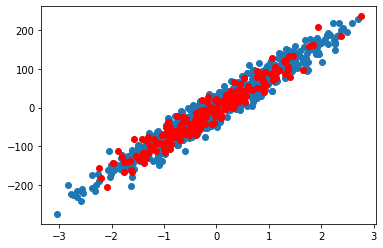

In [4]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, c='r')

In [5]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

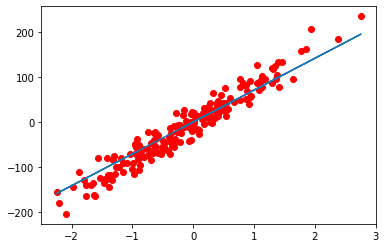

In [6]:
plt.scatter(x_test, y_test, c='r')
plt.plot(x_test, pred)

In [7]:
print(f"Score on training data: {model.score(y_train, model.predict(x_train))}")
print(f"Score on testing data: {model.score(y_test, pred)}")

Score on training data: 0.9267847111560095
Score on testing data: 0.9210578818098943


### Testing with 2 features

In [8]:
X, y = make_regression(n_samples=1000, n_features=2, noise=20, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [10]:
print(f"Score on training data: {model.score(y_train, model.predict(x_train))}")
print(f"Score on testing data: {model.score(y_test, pred)}")

Score on training data: 0.8734500932533035
Score on testing data: 0.8813286267180491
